In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Load the data
df = pd.read_csv("../data/raw/Walmart.csv")  # Adjust filename if different

# Step 3: Basic info
print("Shape:", df.shape)  # (rows, columns)
df.head()


Shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Step 4: Data overview
df.info()

# Step 5: Quick stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
# Step 6: Missing values
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
# Step 7: Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Step 8: Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Step 9: Confirm conversion
df.info()
# Step 10: Final look at data
df.head()

Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


| Column Name      | Description                                 | Data Type |
| ---------------- | ------------------------------------------- | --------- |
| **Store**        | Unique ID of the Walmart store              | Integer   |
| **Date**         | Week of sales record                        | DateTime  |
| **Weekly_Sales** | Total sales revenue for that store and week | Float     |
| **Holiday_Flag** | 1 = Holiday week, 0 = Non-holiday week      | Integer   |
| **Temperature**  | Average temperature for the week (°F)       | Float     |
| **Fuel_Price**   | Average fuel price per gallon in that week  | Float     |
| **CPI**          | Consumer Price Index (inflation indicator)  | Float     |
| **Unemployment** | Unemployment rate for that region           | Float     |


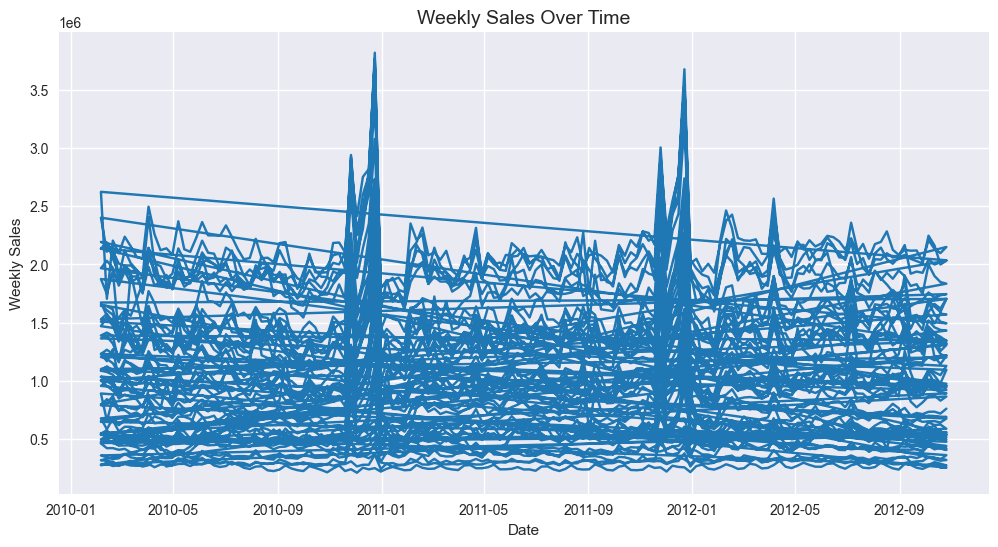

In [6]:
# Step 11: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Step 12: Sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekly_Sales'], color='tab:blue')
plt.title("Weekly Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


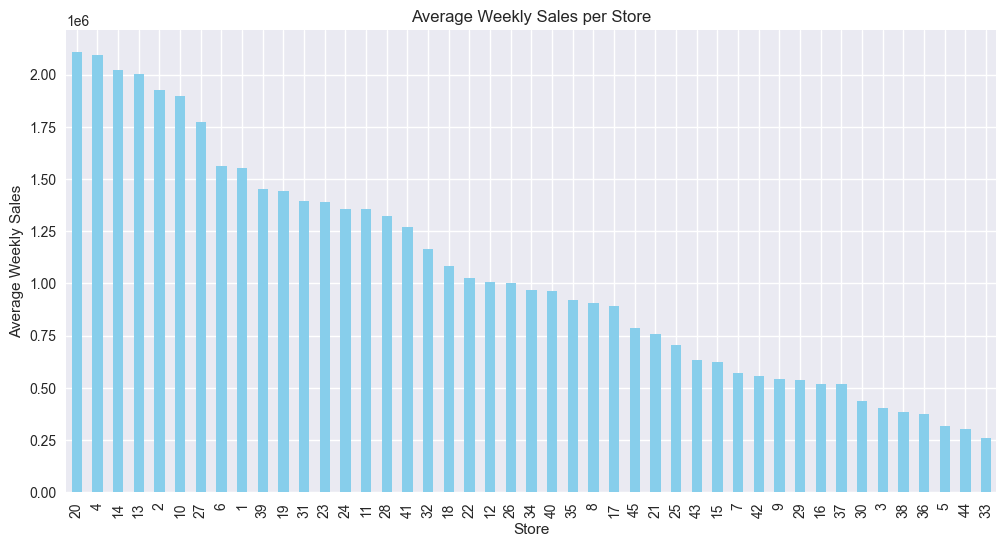

In [7]:
# Step 13: Average sales per store (to check which stores perform better on average)
store_sales = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='skyblue')
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.show()


E:\python_temp\ipykernel_25352\4096260668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='pastel')


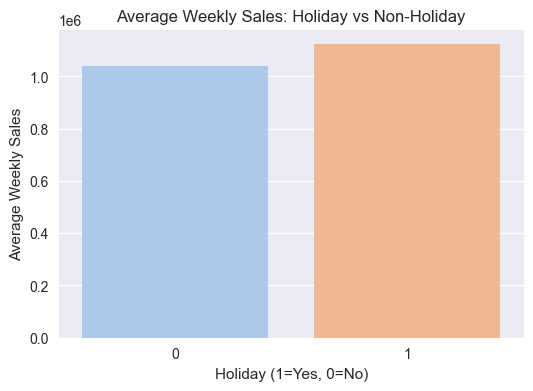

In [8]:
# Step 14: Sales comparison between holiday and non-holiday weeks
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='pastel')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday (1=Yes, 0=No)")
plt.ylabel("Average Weekly Sales")
plt.show()


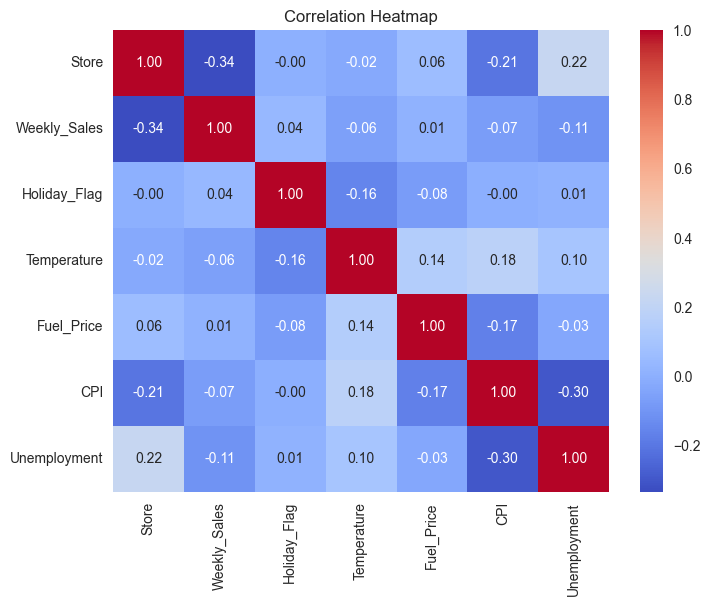

In [9]:
# Step 15: Correlation between numeric features (to see factors that influence sales most strongly)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Step 16: Create time-based features (Year, Month, Week number of the year)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

# Step 17: Add a readable holiday label
df['Is_Holiday_Week'] = df['Holiday_Flag'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Step 18: Average sales per store as a new feature
store_avg = df.groupby('Store')['Weekly_Sales'].mean().rename('Store_Avg_Sales')
df = df.merge(store_avg, on='Store', how='left')

# Step 19: Confirm new features
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Is_Holiday_Week,Store_Avg_Sales
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,Non-Holiday,1.555264e+06
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,Holiday,1.555264e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,Non-Holiday,1.555264e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,Non-Holiday,1.555264e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,Non-Holiday,1.555264e+06


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Store            6435 non-null   int64         
 1   Date             6435 non-null   datetime64[ns]
 2   Weekly_Sales     6435 non-null   float64       
 3   Holiday_Flag     6435 non-null   int64         
 4   Temperature      6435 non-null   float64       
 5   Fuel_Price       6435 non-null   float64       
 6   CPI              6435 non-null   float64       
 7   Unemployment     6435 non-null   float64       
 8   Year             6435 non-null   int32         
 9   Month            6435 non-null   int32         
 10  Week             6435 non-null   int64         
 11  Is_Holiday_Week  6435 non-null   object        
 12  Store_Avg_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(3), object(1)
memory usage: 603.4+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Store_Avg_Sales
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.435000e+03
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,2010.965035,6.447552,25.818182,1.046965e+06
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000,2.598617e+05
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,2010.000000,4.000000,14.000000,5.564039e+05
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,2011.000000,6.000000,26.000000,9.667816e+05
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,2012.000000,9.000000,38.000000,1.395901e+06
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000,2.107677e+06
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.797019,3.238308,14.129201,5.405605e+05


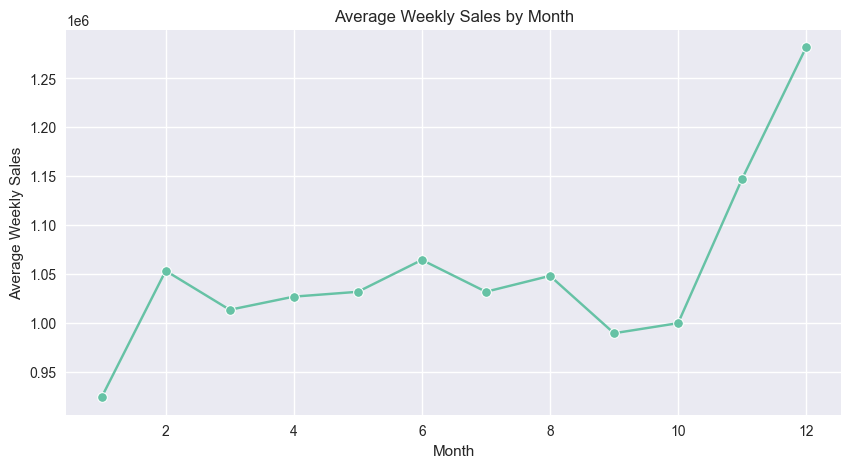

In [12]:
# Step 20: Average sales per month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Average Weekly Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.show()


E:\python_temp\ipykernel_25352\1559395613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="coolwarm")


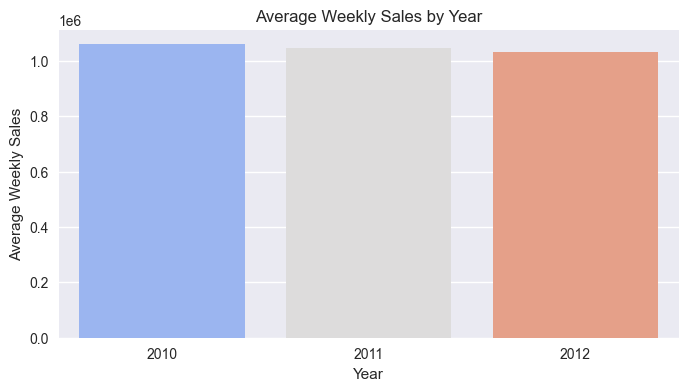

In [13]:
# Step 21: Average sales per year
yearly_sales = df.groupby('Year')['Weekly_Sales'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette="coolwarm")
plt.title("Average Weekly Sales by Year")
plt.xlabel("Year")
plt.ylabel("Average Weekly Sales")
plt.show()


E:\python_temp\ipykernel_25352\184891347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Holiday_Week', y='Weekly_Sales', palette='pastel')


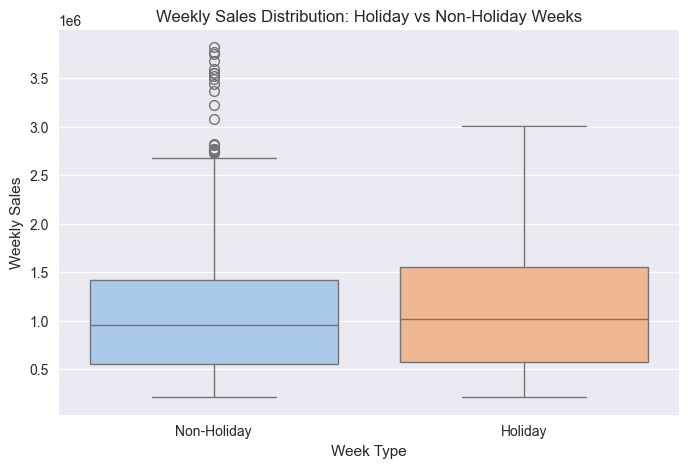

In [14]:
# Step 22: Sales distribution by holiday
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Is_Holiday_Week', y='Weekly_Sales', palette='pastel')
plt.title("Weekly Sales Distribution: Holiday vs Non-Holiday Weeks")
plt.xlabel("Week Type")
plt.ylabel("Weekly Sales")
plt.show()


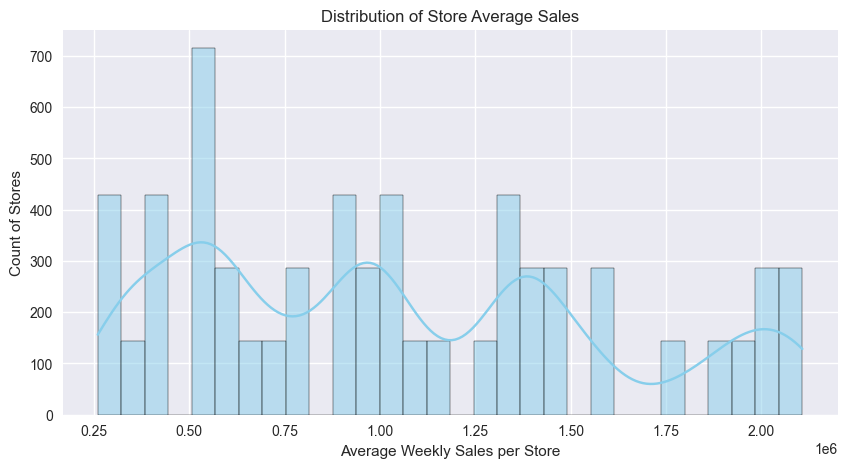

In [15]:
# Step 23: Distribution of average store sales
plt.figure(figsize=(10,5))
sns.histplot(df['Store_Avg_Sales'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Store Average Sales")
plt.xlabel("Average Weekly Sales per Store")
plt.ylabel("Count of Stores")
plt.show()


In [16]:
# Step 24: Select features (independent variables) and target (dependent variable)
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 
            'Unemployment', 'Month', 'Year', 'Week', 'Store_Avg_Sales']
target = 'Weekly_Sales'

X = df[features]
y = df[target]

# Step 25: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5148
Testing samples: 1287


In [17]:
# Step 26: Import and train Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Step 27: Predict on test set
y_pred = model_lr.predict(X_test)

# Step 28: Evaluate model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.3f}")


📊 Linear Regression Performance:
MAE:  96,000.51
RMSE: 154,733.99
R²:   0.926


In [18]:
# Step 29: Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(
    n_estimators=100,      # number of trees
    random_state=42,
    n_jobs=-1              # use all CPU cores for speed
)

model_rf.fit(X_train, y_train)

# Step 30: Predict and evaluate
y_pred_rf = model_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Random Forest Performance:")
print(f"MAE:  {mae_rf:,.2f}")
print(f"RMSE: {rmse_rf:,.2f}")
print(f"R²:   {r2_rf:.3f}")


🌲 Random Forest Performance:
MAE:  50,124.47
RMSE: 79,608.10
R²:   0.980


In [19]:
# Step 31: Compare models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae, mae_rf],
    'RMSE': [rmse, rmse_rf],
    'R²': [r2, r2_rf]
})

results


,Model,MAE,RMSE,R²
0,Linear Regression,96000.510091,154733.987605,0.925680
1,Random Forest,50124.472193,79608.104727,0.980328


E:\python_temp\ipykernel_25352\3448698097.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


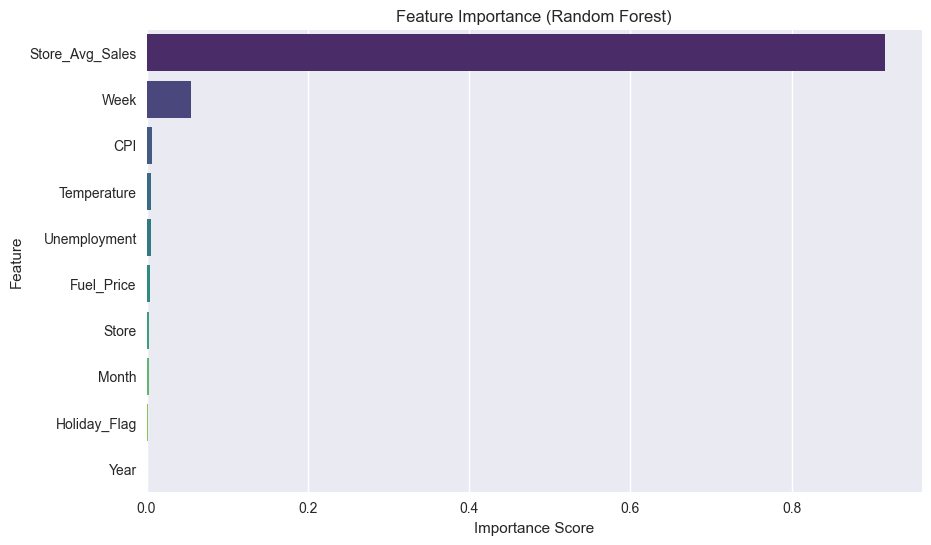

,Feature,Importance
9,Store_Avg_Sales,0.915193
8,Week,0.055038
4,CPI,0.006493
2,Temperature,0.005844
5,Unemployment,0.005682
3,Fuel_Price,0.004263
0,Store,0.003080
6,Month,0.002466
1,Holiday_Flag,0.001314
7,Year,0.000626


In [20]:
# Step 32: Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importance = model_rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Display
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

feature_importance


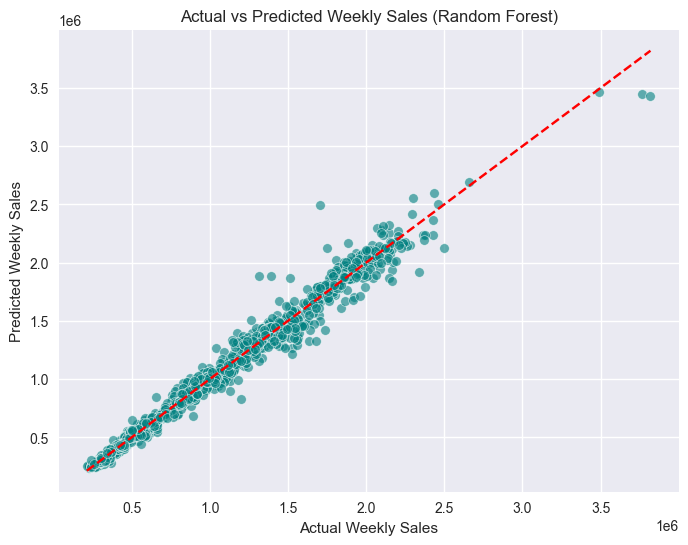

In [21]:
# Step 33: Compare actual vs predicted sales (Random Forest)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='teal')
plt.title("Actual vs Predicted Weekly Sales (Random Forest)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # perfect prediction line
plt.show()


In [22]:
# Step 34: Save trained model (for Random Forest)
import joblib

joblib.dump(model_rf, "../src/random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!
